In [318]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [319]:
df = pd.read_csv("train.csv")

In [320]:
new_df = df.sample(n=10000,random_state=1)

In [321]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
237030,237030,33086,348102,How can I stop playing video games?,Should I stop playing video games with my child?,0
247341,247341,73272,8624,Who is better Donald Trump or Hillary Clinton?,Why is Hillary Clinton a better choice than Do...,1
246425,246425,359482,359483,What do you think is the chance that sometime ...,Do you think there will be another world war/n...,1
306985,306985,1357,47020,Why are so many questions posted to Quora that...,Why do people write questions on Quora that co...,1
225863,225863,334315,334316,Can there even be a movie ever rated 10/10 on ...,What are your 10/10 movies?,0


In [322]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    contractions = { 
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
    decontracted_text = []
    
    for word in q.split():
        if word in contractions:
            word = contractions[word]
        
        decontracted_text.append(word)

    q = ' '.join(decontracted_text)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [323]:
preprocess("This Model is gonna be awesome?!!!")

'this model is gonna be awesome'

In [324]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [304]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
237030,237030,33086,348102,how can i stop playing video games,should i stop playing video games with my child,0
247341,247341,73272,8624,who is better donald trump or hillary clinton,why is hillary clinton a better choice than do...,1
246425,246425,359482,359483,what do you think is the chance that sometime ...,do you think there will be another world war n...,1
306985,306985,1357,47020,why are so many questions posted to quora that...,why do people write questions on quora that co...,1
225863,225863,334315,334316,can there even be a movie ever rated 10 10 on ...,what are your 10 10 movies,0


In [325]:
# Reinitializing BOW Features

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [326]:
# Common words
def common_words(row):
    temp1 = set(map(lambda word: word.lower(), row['question1'].split(" ")))
    temp2 = set(map(lambda word: word.lower(), row['question2'].split(" ")))    
    return len(temp1&temp2)

new_df['common_words'] = new_df.apply(common_words,axis=1)

def total_words(row):
    temp1 = set(map(lambda word: word.lower(), row['question1'].split(" ")))
    temp2 = set(map(lambda word: word.lower(), row['question2'].split(" ")))    
    return (len(temp1)+len(temp2))

new_df['total_words'] = new_df.apply(total_words,axis=1)

new_df['word_shared'] = round(new_df['common_words']/new_df['total_words'],2)

In [307]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_shared
237030,237030,33086,348102,how can i stop playing video games,should i stop playing video games with my child,0,34,47,7,9,5,16,0.31
247341,247341,73272,8624,who is better donald trump or hillary clinton,why is hillary clinton a better choice than do...,1,45,56,8,10,6,18,0.33
246425,246425,359482,359483,what do you think is the chance that sometime ...,do you think there will be another world war n...,1,137,76,29,15,13,40,0.32
306985,306985,1357,47020,why are so many questions posted to quora that...,why do people write questions on quora that co...,1,85,85,16,16,5,30,0.17
225863,225863,334315,334316,can there even be a movie ever rated 10 10 on ...,what are your 10 10 movies,0,50,26,12,6,1,16,0.06


# Advanced Features
### 1. Token Features

- cwc_min: This is the ratio of the number of common words to the length of the smaller question
- cwc_max: This is the ratio of the number of common words to the length of the larger question
- csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
- ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
- last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
- first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

### 2. Length Based Features

- mean_len: Mean of the length of the two questions (number of words)
- abs_len_diff: Absolute difference between the length of the two questions (number of words)
- longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question

### 3. Fuzzy Features

- fuzz_ratio: fuzz_ratio score from fuzzywuzzy
- fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
- token_sort_ratio: token_sort_ratio from fuzzywuzzy
- token_set_ratio: token_set_ratio from fuzzywuzzy

##### We will implement these features along with the previous features to improve upon the accuracy of our model.

In [327]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prabal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [370]:
from nltk.corpus import stopwords

In [329]:
def initialize_token_features(df):
    
    q1 = df['question1']
    q2 = df['question2']
    
    STP = stopwords.words("english")
    
    token_features = [0.0]*8
    
    SAFE_DIV = 0.0001 
    
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if (len(q1_tokens)==0) or (len(q2_tokens)==0):
        return token_features
    
    # Get the non-stopwords in questions
    
    q1_words = set([word for word in q1_tokens if word not in STP])
    q2_words = set([word for word in q2_tokens if word not in STP])
    
    # Get the stop words in questions
    
    q1_stops = set([word for word in q1_tokens if word in STP])
    q2_stops = set([word for word in q2_tokens if word in STP])
    
    # Get the common non-stop words from Question pair
    
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common tokens from the Question pair
    
    common_token_count = len(q1_words.intersection(q2_words))
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [330]:
token_features = new_df.apply(initialize_token_features, axis = 1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [312]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,total_words,word_shared,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
237030,237030,33086,348102,how can i stop playing video games,should i stop playing video games with my child,0,34,47,7,9,...,16,0.31,0.999975,0.799984,0.333322,0.249994,0.571420,0.444440,0,0
247341,247341,73272,8624,who is better donald trump or hillary clinton,why is hillary clinton a better choice than do...,1,45,56,8,10,...,18,0.33,0.999980,0.833319,0.333322,0.249994,0.624992,0.499995,0,0
246425,246425,359482,359483,what do you think is the chance that sometime ...,do you think there will be another world war n...,1,137,76,29,15,...,40,0.32,0.857131,0.499996,0.999986,0.538457,0.399997,0.214285,0,0
306985,306985,1357,47020,why are so many questions posted to quora that...,why do people write questions on quora that co...,1,85,85,16,16,...,30,0.17,0.374995,0.333330,0.333328,0.285710,0.187499,0.187499,0,1
225863,225863,334315,334316,can there even be a movie ever rated 10 10 on ...,what are your 10 10 movies,0,50,26,12,6,...,16,0.06,0.499975,0.166664,0.000000,0.000000,0.166664,0.083333,0,0


In [331]:
import distance

def initialize_length_feature(df):
    
    q1 = df['question1']
    q2 = df['question2']
    
    length_features = [0.0]*3
    
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if (len(q1_tokens)==0) or (len(q2_tokens)==0):
        return length_features
    
    # Absolute length features
    
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
     #Average Token Length of both Questions
        
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [332]:
length_features = new_df.apply(initialize_length_feature, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [315]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
237030,237030,33086,348102,how can i stop playing video games,should i stop playing video games with my child,0,34,47,7,9,...,0.799984,0.333322,0.249994,0.571420,0.444440,0,0,2,8.0,0.771429
247341,247341,73272,8624,who is better donald trump or hillary clinton,why is hillary clinton a better choice than do...,1,45,56,8,10,...,0.833319,0.333322,0.249994,0.624992,0.499995,0,0,2,9.0,0.347826
246425,246425,359482,359483,what do you think is the chance that sometime ...,do you think there will be another world war n...,1,137,76,29,15,...,0.499996,0.999986,0.538457,0.399997,0.214285,0,0,13,21.5,0.298701
306985,306985,1357,47020,why are so many questions posted to quora that...,why do people write questions on quora that co...,1,85,85,16,16,...,0.333330,0.333328,0.285710,0.187499,0.187499,0,1,0,16.0,0.139535
225863,225863,334315,334316,can there even be a movie ever rated 10 10 on ...,what are your 10 10 movies,0,50,26,12,6,...,0.166664,0.000000,0.000000,0.166664,0.083333,0,0,6,9.0,0.259259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301476,301476,254583,424390,have tam bra tamil brahmin started wearing s...,days after wearing shaping undergarments aroun...,0,63,136,11,24,...,0.153845,0.999900,0.111110,0.222220,0.086956,0,0,14,16.0,0.218750
124416,124416,200903,200904,civil engineering what is the difference betw...,what is the difference between castle forged s...,0,83,94,13,17,...,0.285710,0.999980,0.833319,0.166665,0.124999,0,0,4,14.0,0.369048
175599,175599,270339,270340,why is hillary so afraid of putin,i studied in london for 4 years and came back ...,0,33,143,7,33,...,0.000000,0.249994,0.090908,0.000000,0.000000,0,0,22,18.0,0.117647
86430,86430,145773,145774,have you ever seen any chinese dramas like 步步惊...,why do people gossip,0,76,20,17,4,...,0.000000,0.999950,0.249997,0.000000,0.000000,0,0,12,10.0,0.190476


In [333]:
# Fuzzy features

from fuzzywuzzy import fuzz

def initialize_fuzzy_features(df):
    
    q1 = df['question1']
    q2 = df['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features
    

In [334]:
fuzzy_features = new_df.apply(initialize_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [335]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
237030,237030,33086,348102,how can i stop playing video games,should i stop playing video games with my child,0,34,47,7,9,...,0.444440,0,0,2,8.0,0.771429,72,85,69,87
247341,247341,73272,8624,who is better donald trump or hillary clinton,why is hillary clinton a better choice than do...,1,45,56,8,10,...,0.499995,0,0,2,9.0,0.347826,42,49,83,92
246425,246425,359482,359483,what do you think is the chance that sometime ...,do you think there will be another world war n...,1,137,76,29,15,...,0.214285,0,0,13,21.5,0.298701,46,55,70,94
306985,306985,1357,47020,why are so many questions posted to quora that...,why do people write questions on quora that co...,1,85,85,16,16,...,0.187499,0,1,0,16.0,0.139535,53,53,51,59
225863,225863,334315,334316,can there even be a movie ever rated 10 10 on ...,what are your 10 10 movies,0,50,26,12,6,...,0.083333,0,0,6,9.0,0.259259,42,46,50,46


In [ ]:
# EDA

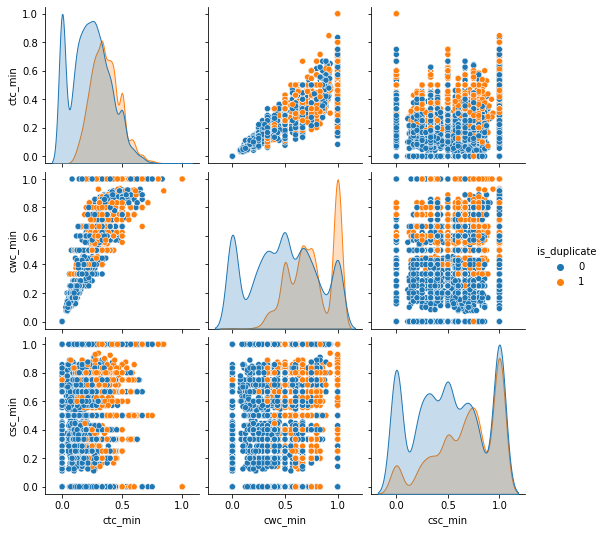

In [336]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

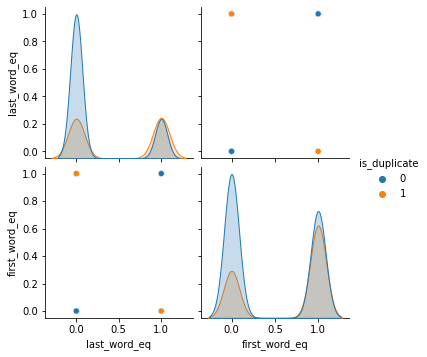

In [337]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

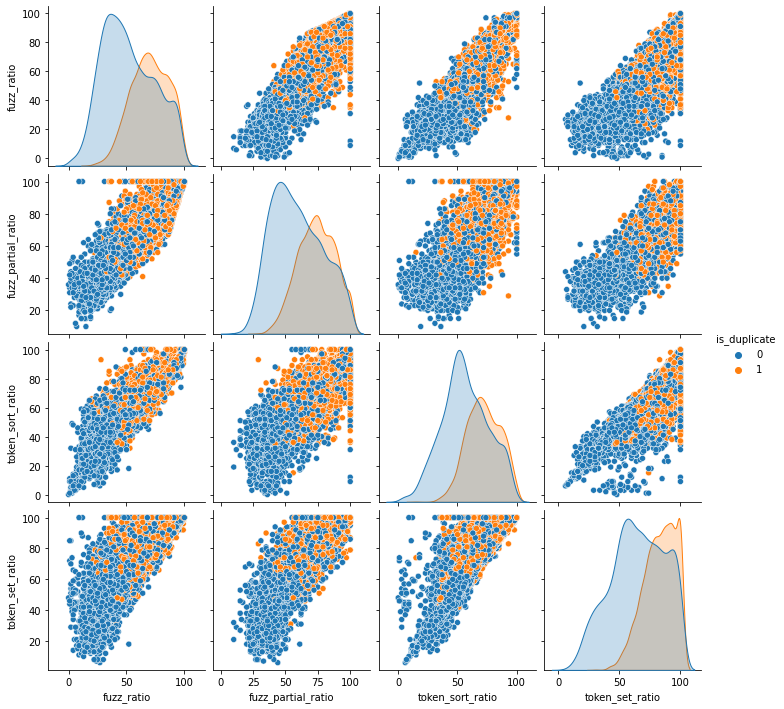

In [338]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

## Model application

In [339]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
237030,how can i stop playing video games,should i stop playing video games with my child
247341,who is better donald trump or hillary clinton,why is hillary clinton a better choice than do...
246425,what do you think is the chance that sometime ...,do you think there will be another world war n...
306985,why are so many questions posted to quora that...,why do people write questions on quora that co...
225863,can there even be a movie ever rated 10 10 on ...,what are your 10 10 movies


In [340]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(10000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_shared,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
237030,0,34,47,7,9,5,16,0.31,0.999975,0.799984,...,0.444440,0,0,2,8.0,0.771429,72,85,69,87
247341,1,45,56,8,10,6,18,0.33,0.999980,0.833319,...,0.499995,0,0,2,9.0,0.347826,42,49,83,92
246425,1,137,76,29,15,13,40,0.32,0.857131,0.499996,...,0.214285,0,0,13,21.5,0.298701,46,55,70,94
306985,1,85,85,16,16,5,30,0.17,0.374995,0.333330,...,0.187499,0,1,0,16.0,0.139535,53,53,51,59
225863,0,50,26,12,6,1,16,0.06,0.499975,0.166664,...,0.083333,0,0,6,9.0,0.259259,42,46,50,46


In [341]:
from sklearn.feature_extraction.text import TfidfVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

tf = TfidfVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(tf.fit_transform(questions).toarray(),2)

In [342]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(10000, 6000)

In [343]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(10000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_shared,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
237030,0,34,47,7,9,5,16,0.31,0.999975,0.799984,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
247341,1,45,56,8,10,6,18,0.33,0.999980,0.833319,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
246425,1,137,76,29,15,13,40,0.32,0.857131,0.499996,...,0.0,0.155388,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
306985,1,85,85,16,16,5,30,0.17,0.374995,0.333330,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
225863,0,50,26,12,6,1,16,0.06,0.499975,0.166664,...,0.0,0.000000,0.0,0.0,0.281744,0.0,0.0,0.0,0.0,0.0


In [344]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [345]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.758

In [346]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7695

In [347]:
from sklearn.metrics import confusion_matrix

In [348]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[1019,  257],
       [ 227,  497]], dtype=int64)

In [349]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[1027,  249],
       [ 212,  512]], dtype=int64)

In [350]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [351]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [352]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [353]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [354]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [362]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = tf.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = tf.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [363]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [373]:
rf.predict(query_point_creator(q1,q4))

array([1], dtype=int64)

In [368]:
tf

TfidfVectorizer(max_features=3000)

In [372]:
import pickle

pickle.dump(xgb,open('model.pkl','wb'))
pickle.dump(tf,open('tf.pkl','wb'))
pickle.dump(STP,open('stopwords.pkl','wb'))